# Lab exercise 1: Stochastic simulation and Monte Carlo

## A simulation: Throw dice

**Monte Carlo methods** can be used to **simulate** different types of **processes**. Here, you will
make a simple simulation using random numbers. In this case, the ‘process’ is to throw a dice
and to calculate the mean of the results.

#### Brief Introduction:

One might ask the question: what is the expected value if we throw a dice with six sides numbered
$[1, 2, 3, 4, 5, 6]$ many times? The answer is of course easy to compute in this case, $\mu = (1+2+3+4+5+6)/6 =
3.5$. However, we will use this as a simple case to illustrate how a Monte Carlo method works.
We will compute the mean, approximating the expected value, by simulating that we throw a dice multiple times. We
will simulate it many times, store the results in a vector, and calculate the mean.

The algorithm or structure of the Monte Carlo simulation when throwing the dice $N$ times is:


    for i = 1:N:
       Do one stochastic simulation of a dice throw.
       result[i] = the result of the simulation
    end
    Compute mean of result

The stochastic process ’throw of a dice’ can be simulated by generating a random integer in the range $[1, 6]$. All six integers have the same probability, so this is a **uniform probability distribution**.
More precisely, we will use a **discrete uniform distribution**. To draw samples from this distribution, we will first use the function `numpy.random.rand` to drawn samples from the continuous uniform distribution like we did in the previous part of the lab, and then use these random numbers to construct the required discrete distribution from the continuous one.

To create the required discrete uniform distribution on the interval $[1, 6]$, you can use
the numpy function `numpy.floor(x)`, which rounds a floating point number x to the nearest integer less than x. The code snippet below simulates one dice throw.

a) Try to understand how this command works by running the cell and observing the output. Can you connect it to the **inverse transform method**? Why is `numpy.floor` used and what does
floor mean? Convince yourself that this code snippet generates a random number drawn from the discrete uniform distribution on the interval $[1, 6]$. Remember that `numpy.random.rand(1)` draws a sample from the continuous uniform distribution on the interval $[0, 1)$.

*Note:* A code for sampling from a general discrete distribution (different probabilities) is given in Lecture notes.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
y = np.floor(1+6*np.random.rand(1))
print(y[0])

5.0


Using `numpy.random.rand` to simulate the stochastic process of dice throws, we can simplify the Monte Carlo-algorithm above by directly generating $N$ random numbers without the for-loop, by calling `numpy.random.rand(N)`, where $N$ is the number of dice throws we wish to simulate (i.e. the number of random samples we wish to draw from our probability distribution).

b) Complete the function **throwDice** that simulates $N$ dice throws and returns an array `y` containing the result of all dice throws, i.e. write a function that generates $N$ random numbers and returns the generated numbers in a numpy array.

In [7]:
def throwDice(N):
    # enter your code here
    y = np.floor(1+6*np.random.rand(N))
    return y

c) Use the function throwDice to generate random vectors $y_1$, $y_2$, $y_3$ of length $10^{4}$, $10^{5}$ and $10^{6}$. Compute the mean value for each of the vectors generated by your simulation. Finally, calculate the difference between the exact mean value of this stochastic process (= 3.5) and
the mean values computed via the Monte Carlo method. Intuitively, the difference
between the computed mean and the exact one should become smaller as we increase the
number of random numbers used. Does this hold for your results? Hint: You can calculate the mean of a vector y using the function `numpy.mean(y)`.

In [12]:
# enter your code here
y1 = throwDice(10**4)
y2 = throwDice(10**5)
y3 = throwDice(10**6)

meany1 = y1.mean()
meany2 = y2.mean()
meany3 = y3.mean()

diffy1 = 3.5 - meany1
diffy2 = 3.5 - meany2
diffy3 = 3.5 - meany3

print(diffy1, diffy2, diffy3)

-0.009399999999999853 0.008669999999999956 0.0005459999999999354


As numpy.random.rand generates new random numbers each time the function is called, the computed
mean will differ a little each time you repeat the Monte Carlo method. Investigate this
by repeating the calculation with N random numbers $10^{4}$ times and save the mean values
in a vector. The function `dice_simulation(M, N)` repeats the process of $N$ dice throws $M$ times, and stores the mean value of each individual process in a vector.

d) Go through the function and make sure you understand what happens in each part of the code. Call the function in the empty cell below, using 1, 3 and 100 dice throws, and look at the generated histograms. It looks like it is approaching a certain distribution. Do you recognize which distribution?.

In [9]:
def dice_simulation(M, N):

    # vector that wil be used for storing the mean values
    y_mean = np.zeros(M)

    # simulate N dice throws
    for i in range(0, M):
        y = np.floor(1+6*np.random.rand(N)) # one Monte Carlo Simulation
        y_mean[i] = np.mean(y)

    # plot a histogram of the mean values generated by the M Monte Carlo simulations
    plt.figure(1)
    plt.hist(y_mean, bins=30)
    plt.title('Mean')
    plt.xlabel('Sample')
    plt.ylabel('Count')
    plt.show()

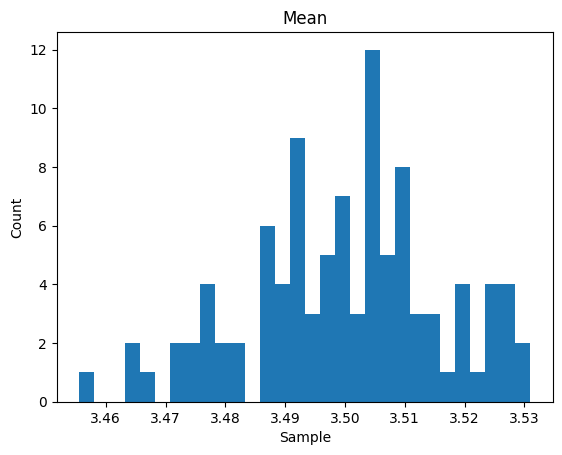

In [14]:
# enter your code here
dice_simulation(100, 10**4)

e)  To ‘prove’ what distribution it is in, run the program again but this time with a large
number of dice throws, N = $10^{4}$. What distribution is it, and what is the expected value of this distribution according to the histogram?

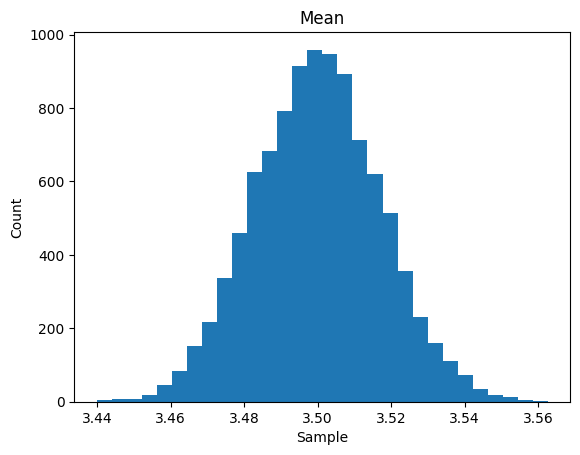

In [15]:
# enter your code here
dice_simulation(10**4, 10**4)

What you have seen in these experiments is an illustration of the so-called **central limit
theorem** in statistics. The theorem states that if you take an increasing number of random
samples from a distribution (in this case a uniform distribution), then the distribution of
the sample means will approach a normal distribution

_**To think about:**_  
* What would happen if you would be able use infinitely many
random numbers (=infinitely many dice throws)?
* When you increase the number of dice throws it approaches a
normal distribution, but the distribution also gets more and
more ‘narrow’, i.e. the variance approaches zero.
The variance here is therefore a way of measuring
the error in the Monte Carlo simulation.